## Implementation of the Stochastic Gradient Descent Optimizer Algorithm

We will first begin by training our dataset using the Logistic 
Regression Algorithm, via the implementation of the Gradient 
Descent (GD) 
optimizer followed by the Stochastic Gradient Descent (SGD) optmizer. 
Finally, a performance curve depicting the loss trends for both 
the optimizer algorithms would be plotted for comparison and to 
investigate if infact the SGD optimizer gives lesser losses (and 
hence higher accuracy models) when compared to the normal vanilla 
GD optimizers.

In [54]:
# do the necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [55]:
# this function will return the sigmoid activation probablity vector
# for a given input X vector
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

# this function returns the sigmoid derivative vector for input x 
# vector, where input x are xvectors already sigmoid activated
def sigmoid_deriv(x):
    return x * (1 - x)

# this function will do the binary class prediction on the testx 
# vector and hence returns a predicty vector
def predict(X, W):
    preds = sigmoid_activation(X.dot(W))
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1
    return preds

# this is the next bacth method that will return a batch of x's nd y's
# everytime the function is iterated over 
def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i+batchSize], y[i:i+batchSize])

In [56]:
# generate 1000 samples of a 2 dimensional features with 2 class 
# target labels
x, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=1.5,
                  random_state=42)
y = y.reshape(y.shape[0], 1)

# insert a column of 1's as a last entry in the feature matrix
one_vector = np.ones((x.shape[0], 1), dtype='float64')
x = np.concatenate((x, one_vector), axis=1) # x is now a 1000x3 matrix

# now partition the X data into training and testing datasets
trainx, testx, trainy, testy = train_test_split(x, y, 
                                                random_state=42, 
                                                test_size=0.5)

# initalise our weight matrix with random values. X is row x 3 dim.
# when W multiplies with X, we need one value for each X. so if X 
# is 1000 x 3, result shud be 1000 x 1 so W be 3 x 1
print(f'[INFO] training .....')
W = np.random.rand(x.shape[1], 1)
W_sgd = W.copy()
W_gd = W.copy()
losses_sgd = []
losses_gd = []

[INFO] training .....


Below we will train on the dataset using batch stochastic gradient 
descent algorithm as the optimiser.

In [57]:
# initialise epoch no, learning rate and batchsize
epochs = 100
alpha = 0.01
batchSize = 256

for epoch in range(epochs+1):
    
    # initialise the total loss for the epoch
    epochLoss = []
    
    # loop over our data in batches
    for batchx, batchy in next_batch(trainx, trainy, batchSize):
        preds = sigmoid_activation(batchx.dot(W_sgd))
        error = preds - batchy
        epochLoss.append(np.sum(error**2))
        
        d = error * sigmoid_deriv(preds)
        gradient = batchx.T.dot(d)
        
        W_sgd+= -alpha*gradient
    # once the batching is done for an epoch, get avg loss of the 
    # epoch
    loss = np.average(epochLoss)
    losses_sgd.append(loss)
    
    # now going off to next epoch
    if epoch==0 or (epoch)%5 ==0:
        print(f'[INFO] epoch: {epoch}, loss: {loss}')

[INFO] epoch: 0, loss: 6.472792432851783
[INFO] epoch: 5, loss: 0.9362850460612109
[INFO] epoch: 10, loss: 0.8296684448054285
[INFO] epoch: 15, loss: 0.7601933560270203
[INFO] epoch: 20, loss: 0.7100370728039961
[INFO] epoch: 25, loss: 0.6715052866363944
[INFO] epoch: 30, loss: 0.6405865860862854
[INFO] epoch: 35, loss: 0.6149728760242402
[INFO] epoch: 40, loss: 0.5932317407136012
[INFO] epoch: 45, loss: 0.5744213532578268
[INFO] epoch: 50, loss: 0.557893745545293
[INFO] epoch: 55, loss: 0.5431865543517699
[INFO] epoch: 60, loss: 0.5299598010193538
[INFO] epoch: 65, loss: 0.5179571316717201
[INFO] epoch: 70, loss: 0.5069810725885187
[INFO] epoch: 75, loss: 0.49687668288775966
[INFO] epoch: 80, loss: 0.4875204331906014
[INFO] epoch: 85, loss: 0.47881244460128125
[INFO] epoch: 90, loss: 0.47067095064380915
[INFO] epoch: 95, loss: 0.463028266908438
[INFO] epoch: 100, loss: 0.45582780613696794


Below we will train on the dataset using vanilla gradient descent
algorithm as the optimiser. 

In [58]:

# loop over the desired number of epochs
for epoch in np.arange(epochs + 1):
    # trainX.W will be a 500x1 vector of scores passed to the sigmoid
    # a 500x1 preds probability vector is then returned
    preds = sigmoid_activation(trainx.dot(W_gd))

    # error is the difference between the 500x1 probability vector
    # and the 500x1 true trainY vector
    error = preds - trainy

    # aggregate all losses as square loss into a single  number
    loss = np.sum(error ** 2)
    losses_gd.append(loss)
    
    # this is where we calculate the gradient 
    d = error * sigmoid_deriv(preds)
    gradient = trainx.T.dot(d)

    # now male the gradient descent update of the weight matrix
    W_gd += -alpha * gradient

    # display loss info after every 5 epochs
    if epoch == 0 or (epoch) % 5 == 0:
        print(f'[INFO] epoch={epoch}, loss={loss}')

[INFO] epoch=0, loss=21.179762448350274
[INFO] epoch=5, loss=1.7847804645333034
[INFO] epoch=10, loss=1.2502905516204426
[INFO] epoch=15, loss=1.16581382768638
[INFO] epoch=20, loss=1.132141856272245
[INFO] epoch=25, loss=1.1039461912305324
[INFO] epoch=30, loss=1.0784817465467667
[INFO] epoch=35, loss=1.055234193236873
[INFO] epoch=40, loss=1.0338614285804413
[INFO] epoch=45, loss=1.014093873325359
[INFO] epoch=50, loss=0.9957143192002159
[INFO] epoch=55, loss=0.9785454424094828
[INFO] epoch=60, loss=0.9624408206798208
[INFO] epoch=65, loss=0.9472783084198146
[INFO] epoch=70, loss=0.9329550708919958
[INFO] epoch=75, loss=0.9193838077246062
[INFO] epoch=80, loss=0.9064898429942218
[INFO] epoch=85, loss=0.8942088561193869
[INFO] epoch=90, loss=0.8824850930712472
[INFO] epoch=95, loss=0.8712699420859153
[INFO] epoch=100, loss=0.8605207891484754


Let us plot the loss curves for the models trained using 
Stochastic Gradient Descent Vs vanilla Gradient Descent. We expect 
that the vanilla gradient descent algorithm would show lesser loss 
reduction over the epochs as opposed to the stochastic variety.

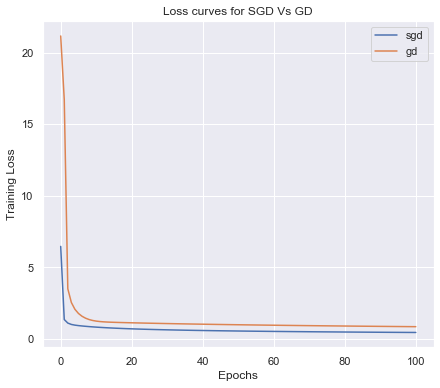

In [59]:
# now plot the loss performance
f, ax = plt.subplots(1,1,figsize=(7,6)) # type: _, axes.Axes
sns.lineplot(x=range(0, epochs+1), y = losses_sgd, ax=ax, label='sgd')
sns.lineplot(x=range(0, epochs+1), y = losses_gd, ax=ax, label='gd')
ax.set_title('Loss curves for SGD Vs GD')
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Loss');

The loss curves clearly show that the SGD algorithm is better in 
reducing training losses when compared to the vanilla GD optimizer.
Additionally, convergence is reached earlier with higher accuracy. 
This makes the SGD optimizer both faster and more accurate than the
 normal GD optimizer.